# Simulation of Open-Loop and Closed-Loop Processes using Step Input and Time Delay

##In order to use the library "control", it is mandatory to install it first.

In [1]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.2 MB/s eta 0:00:00


##Importing the necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

## Function to create the Transfer Function

In [6]:
# Function to define transfer function with or without time delay
def define_tf(order):
    if order == 1:
        num = float(input("Enter the process constant in the numerator: "))
        a = float(input("Enter time constant of s (tau) in the denominator: "))
        b = float(input("Enter the constant term in the denominator: "))
        return ctrl.tf([num], [a, b])
    elif order == 2:
        num = float(input("Enter theprocess constant numerator: "))
        a = float(input("Enter the coefficient of 's^2' in the denominator: "))
        b = float(input("Enter the coefficient of 's' in the denominator: "))
        c = float(input("Enter the constant term in the denominator: "))
        return ctrl.tf([num], [a, b, c])


## Function to obtain the Second-Order Pade Approximation


In [7]:
# Function to add time delay using Pade approximation
def add_delay(tf, delay):
    num, den = ctrl.pade(delay, 2)  # 2nd-order Pade approximation
    delay_tf = ctrl.tf(num, den)
    return tf * delay_tf

##Function to plot the step response in open-loop and closed-loop

In [8]:
# Function to plot step response
def plot_step_response(t_open, y_open, t_closed, y_closed):
    plt.figure(figsize=(10, 6))
    plt.plot(t_open, y_open, label="Open Loop")
    plt.plot(t_closed, y_closed, label="Closed Loop")
    plt.title('Step Response')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

## Main Function

Enter the order of the system (1 or 2): 1
Enter the process constant in the numerator: 1
Enter time constant of s (tau) in the denominator: 1
Enter the constant term in the denominator: 1
Do you want to add a time delay approximation? (yes/no): yes
Enter the delay value: 0.1


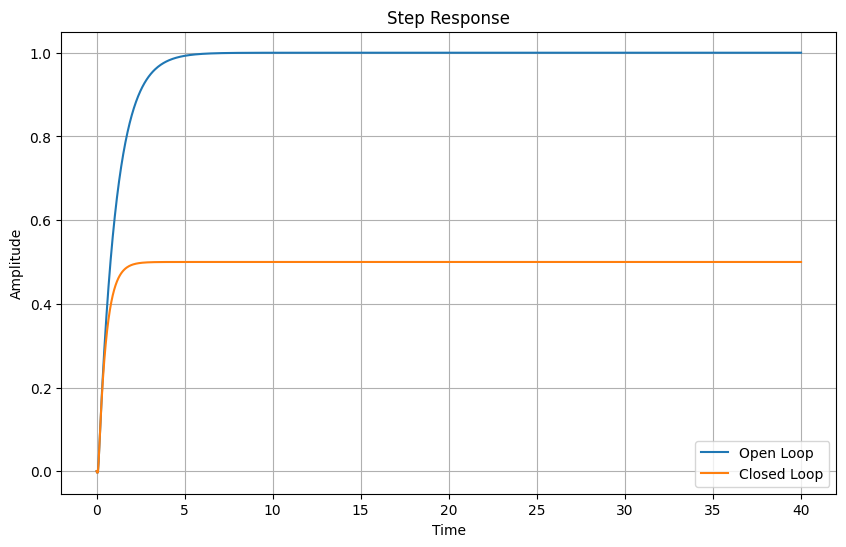

In [12]:
# Main function
def main():
    order = int(input("Enter the order of the system (1 or 2): "))
    tf_open = define_tf(order)
    tf_closed = ctrl.feedback(tf_open)  # Automatically handles unit feedback

    # Ask the user if they want to add a time delay
    add_delay_flag = input("Do you want to add a time delay approximation? (yes/no): ")
    if add_delay_flag.lower() == "yes":
        delay = float(input("Enter the delay value: "))
        tf_open = add_delay(tf_open, delay)
        tf_closed = ctrl.feedback(tf_open)

    t_end = max(len(tf_open.num[0][0]), len(tf_open.den[0][0]), len(tf_closed.num[0][0]), len(tf_closed.den[0][0])) * 10
    t = np.linspace(0, t_end, 1000)

    # Compute the step responses for both open-loop and closed-loop systems
    t_open, y_open = ctrl.step_response(tf_open, T=t)
    t_closed, y_closed = ctrl.step_response(tf_closed, T=t)

    # Call plot_step_response with the correct arguments
    plot_step_response(t_open, y_open, t_closed, y_closed)

# Running the main function
main()